In [ ]:
https://www.researchgate.net/publication/320339964_Naive_Bayes_Switching_Linear_Dynamical_System_A_model_for_dynamic_system_modelling_classification_and_information_fusion

https://www.sciencedirect.com/science/article/pii/S0001457520306680

# Exploratory analysis
This notebook includes the exploratory analysis including the preprocessing of data and research question of our dataset.

#### Data
The data for this project investigates traffic accidents in Victoria. Data is provided from CrashStats and includes information about road crashes in Victoria and contains features such as road condition, location, wether condition, crash type, road user type, time, type of car. 

These features will be used to analyse the degree of injury, temporal evolution etc.

models to be used
* Baysian Spatial Count Models

data extracted from: https://discover.data.vic.gov.au/dataset/crash-stats-data-extract



**Research question**
* investigate causality between areas, features that are more applicable in some areas compared to others areas. Some areas might be influenced higly by bad road conditions while others by bad vehicles? What tp be aware of when driving in a secific area. 
*   speedzone - is speedzone something that influence no accidents and killings
* divide by area 
    * what features describe the number of killings and accidents in an area


**Model**
* Spatial bayesian count model



**Baseline PGM**

The baseline is a model where we assume a linear relationship between the features and the number of accidents in a location. The PGM looks as follows:
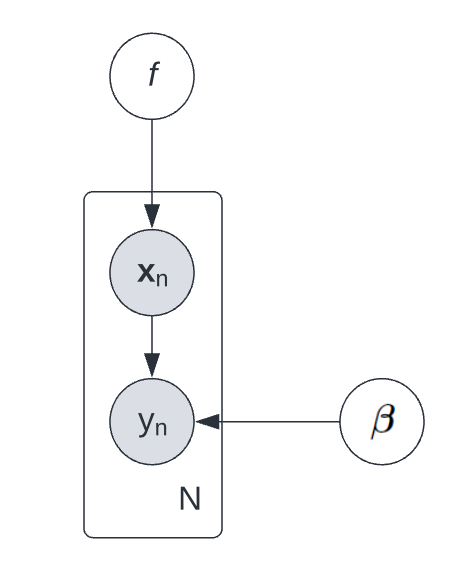

Our features will be selected using a feature selection (LARS), which will be eleaborated later.




In [3]:
# Load data
df_acc = pd.read_csv("Data/ACCIDENT.csv")  
df_chain = pd.read_csv("Data/ACCIDENT_CHAINAGE.csv")  
df_event = pd.read_csv("Data/ACCIDENT_EVENT.csv")  
df_loc = pd.read_csv("Data/ACCIDENT_LOCATION.csv")  
df_atmos = pd.read_csv("Data/ATMOSPHERIC_COND.csv")  
df_node_complex = pd.read_csv("Data/NODE_ID_COMPLEX_INT_ID.csv")  # 
df_person = pd.read_csv("Data/PERSON.csv")  # person description
df_road = pd.read_csv("Data/ROAD_SURFACE_COND.csv")  # road conditions - dry/wet
df_veh = pd.read_csv("Data/VEHICLE.csv")  # type of vehicle
df_subda = pd.read_csv("Data/SUBDCA.csv")  # code to descirbe type of accident
df_node = pd.read_csv("Data/NODE.csv")  # coordinates

/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,9,10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,25,26,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [191]:
df_loc

ACCIDENT_NO  NODE_ID  ROAD_ROUTE_1        ROAD_NAME ROAD_TYPE  \
0       T20060000010    43078        2090.0           FOSTER    STREET   
1       T20060000018    29720        5057.0           HALLAM      ROAD   
2       T20060000022   203074        9999.0           BROWNS      ROAD   
3       T20060000023    55462        2400.0       SPRINGVALE      ROAD   
4       T20060000026   202988        9999.0        ELIZABETH    AVENUE   
...              ...      ...           ...              ...       ...   
203703  T20200019239   665835        9999.0        ALEXANDRA    AVENUE   
203704  T20200019247   665912        9999.0         MATTHEWS      ROAD   
203705  T20200019250   226603        5814.0           PLENTY      ROAD   
203706  T20200019253   665836        2560.0             OMEO   HIGHWAY   
203707  T20200019417   666096        2050.0  LOWER DANDENONG      ROAD   

          ROAD_NAME_INT ROAD_TYPE_INT  DISTANCE_LOCATION DIRECTION_LOCATION  \
0                MCCRAE        STREET                0.0                 SW   
1       BELGRAVE-HALLAM          ROAD               70.0                  S   
2              TRUEMANS          ROAD              210.0                  W   
3           KEYSBOROUGH        AVENUE                0.0                  N   
4             GREENHOOD      CRESCENT               20.0                  N   
...                 ...           ...                ...                ...   
203703         ANDERSON        STREET              147.0                  W   
203704       FITZGERALD          ROAD              413.0                  S   
203705             BUSH     BOULEVARD                0.0                 SW   
203706       CALLAGHANS          ROAD             4531.0                 NE   
203707          CASSAVA         COURT               26.0                  E   

        NEAREST_KM_POST OFF_ROAD_LOCATION  
0                   NaN               NaN  
1                   NaN               NaN  
2                   NaN               NaN  
3                   NaN               NaN  
4                   NaN               NaN  
...                 ...               ...  
203703              NaN               NaN  
203704              NaN               NaN  
203705              NaN               NaN  
203706              NaN               NaN  
203707              NaN               NaN  

[203708 rows x 11 columns]

## Intial drafts of first models and PGM + Generative process


**Spørgsmål**
* Hvordan skal vi lave en PGM 
    * Hvordan laver vi fordelingerne? (eks med cyklist)
    * Skal vi gøre det før vi laver noget data - udelukkende logik?
    * Hvordan adskiller man variablene?
    

**Model**
* Temporal models - at what time does the accident occur
* Classification model - degree/type of injury


* Peek or non peek hour

* Predict time between the next accident
* No of accidents on the n'th day


**Noter** https://towardsdatascience.com/using-machine-learning-to-predict-car-accidents-44664c79c942
To understand driver risk factors, we created a Driver Score, using each driver’s unique characteristics. Every driver would be able to input information including their age and vehicle type to get back a value describing their risk of having a severe accident. In addition, the model is able to inform that driver about the major factors of their risk.
For example, it might be that for some drivers the major cause of risk is having an old vehicle, while for others it might be that they live in a rural area common for having poor road conditions. By having this information, individual drivers can make more informed decisions going forward, for instance, purchasing vehicles that pose a lower risk.

## Exploratory section

**Interesting attributes to look into**
* Road condition and type 
* Person
* Wether - ATMOSPHERIC_COND
* Type of vehicle
* Time of day
* Speed zone



* Casualty characteristics (e.g. gender, age and home area type)
* Situational variables (e.g. weather, road type and light conditions)
* Accident descriptors (e.g. severity, presence of police)
* Vehicle descriptors (e.g. age, power, type, model)

**Target**
* Probability for accident
* Degree of injury


**data prep**
* Size of data
* Data control/ Data stats
    * Boxplot - check for outliers etc (IQR)
    * 

### Data description
Description of features??



## Descriptive Statistics

**Descriptive analysis**
* Visualise number of accidents dependent on time in a period, categorised by location
* Visualise average number of accidents dependent on day, categorised by location
    * Compare Sunday and Wednesday?
    * Weekly trends
* Average accident pr hour
    * Hourly trends
* Distributions
    * Distributions of number of accidents
    * Distribution of type of vehicles
    * Distirbution of accidents in different events
    * Disitrbution of event type
    * Distirbution of sex and type of injury
    * Distirbution of age and type of injury
    * Distirbution of wether and type of injury
  
* Visualise no of accident on a map (density figure) Visualise in what locations there are a lot of accidents


### Date preprocessing

In [25]:
df_acc['date'] = df_acc['ACCIDENTDATE']+" "+df_acc['ACCIDENTTIME']

In [26]:
df_acc['date'] = pd.to_datetime(df_acc['date'])
df_acc['year'] = df_acc.date.dt.year
df_acc['month'] = df_acc.date.dt.month
df_acc['day'] = df_acc.date.dt.day
df_acc['year'] = df_acc.date.dt.year
df_acc['hour'] = df_acc.date.dt.hour
df_acc['minute'] = df_acc.date.dt.minute

In [189]:
df_loc

ACCIDENT_NO  NODE_ID  ROAD_ROUTE_1        ROAD_NAME ROAD_TYPE  \
0       T20060000010    43078        2090.0           FOSTER    STREET   
1       T20060000018    29720        5057.0           HALLAM      ROAD   
2       T20060000022   203074        9999.0           BROWNS      ROAD   
3       T20060000023    55462        2400.0       SPRINGVALE      ROAD   
4       T20060000026   202988        9999.0        ELIZABETH    AVENUE   
...              ...      ...           ...              ...       ...   
203703  T20200019239   665835        9999.0        ALEXANDRA    AVENUE   
203704  T20200019247   665912        9999.0         MATTHEWS      ROAD   
203705  T20200019250   226603        5814.0           PLENTY      ROAD   
203706  T20200019253   665836        2560.0             OMEO   HIGHWAY   
203707  T20200019417   666096        2050.0  LOWER DANDENONG      ROAD   

          ROAD_NAME_INT ROAD_TYPE_INT  DISTANCE_LOCATION DIRECTION_LOCATION  \
0                MCCRAE        STREET                0.0                 SW   
1       BELGRAVE-HALLAM          ROAD               70.0                  S   
2              TRUEMANS          ROAD              210.0                  W   
3           KEYSBOROUGH        AVENUE                0.0                  N   
4             GREENHOOD      CRESCENT               20.0                  N   
...                 ...           ...                ...                ...   
203703         ANDERSON        STREET              147.0                  W   
203704       FITZGERALD          ROAD              413.0                  S   
203705             BUSH     BOULEVARD                0.0                 SW   
203706       CALLAGHANS          ROAD             4531.0                 NE   
203707          CASSAVA         COURT               26.0                  E   

        NEAREST_KM_POST OFF_ROAD_LOCATION  
0                   NaN               NaN  
1                   NaN               NaN  
2                   NaN               NaN  
3                   NaN               NaN  
4                   NaN               NaN  
...                 ...               ...  
203703              NaN               NaN  
203704              NaN               NaN  
203705              NaN               NaN  
203706              NaN               NaN  
203707              NaN               NaN  

[203708 rows x 11 columns]

## Data viz

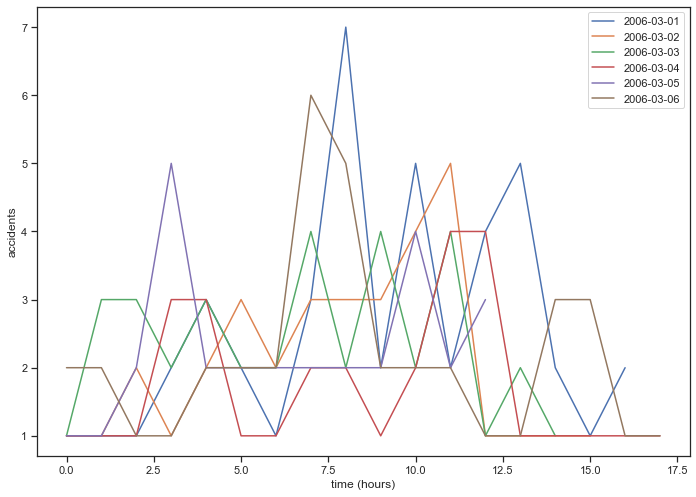

In [127]:
df_agg = df_acc.groupby([pd.Grouper(key='date',freq='H'),df_acc.only_date,df_acc.hour]).size().reset_index(name='No_accidents')
df_agg['date_sting'] = df_agg['date'].dt.strftime('%Y-%m-%d')
dates = []
for day in range(1,7):   # we will search for days 1-15
    date = "2006-03-%.2d" % (day,)
    dates.append(date)
    plt.plot(df_agg[df_agg.date_sting == date]["No_accidents"].values)   # select lines with corresponding date
plt.xlabel("time (hours)")
plt.ylabel("accidents")
plt.legend(dates)

## Average no of accidents

<AxesSubplot:xlabel='hour', ylabel='accidents'>

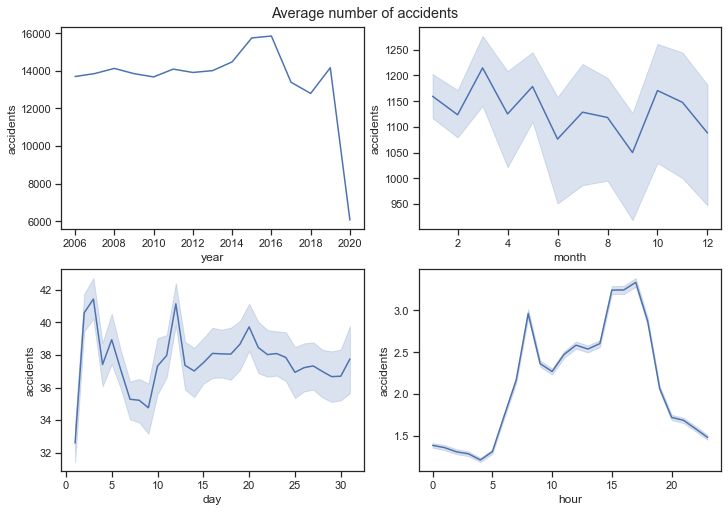

In [181]:
df_agg_accidents_year = df_acc.groupby('year')['ACCIDENTTIME'].agg(['size']).rename(columns={'size': 'accidents'}).reset_index()
df_agg_accidents_monthly =  df_acc.groupby(['year','month'])['ACCIDENTTIME'].agg(['size']).rename(columns={'size': 'accidents'}).reset_index()
df_agg_accidents_day =   df_acc.groupby(['year','month','day'])['ACCIDENTTIME'].agg(['size']).rename(columns={'size': 'accidents'}).reset_index()
df_agg_accidents_hour =  df_acc.groupby(['year','month','day','hour'])['ACCIDENTTIME'].agg(['size']).rename(columns={'size': 'accidents'}).reset_index()
sns.set(style="ticks")
fig, axs =plt.subplots(2,2, constrained_layout=True, figsize=(10, 7))
fig.suptitle('Average number of accidents')
sns.lineplot(x="year", y="accidents",  data=df_agg_accidents_year, ax=axs[0,0])
sns.lineplot(x = "month", y = "accidents", data = df_agg_accidents_monthly, ax=axs[0,1])
sns.lineplot(x = "day", y = "accidents", data = df_agg_accidents_day, ax=axs[1,0])
sns.lineplot(x = "hour", y = "accidents", data = df_agg_accidents_hour, ax=axs[1,1])

## Average killed by accidents

<AxesSubplot:xlabel='hour', ylabel='killed'>

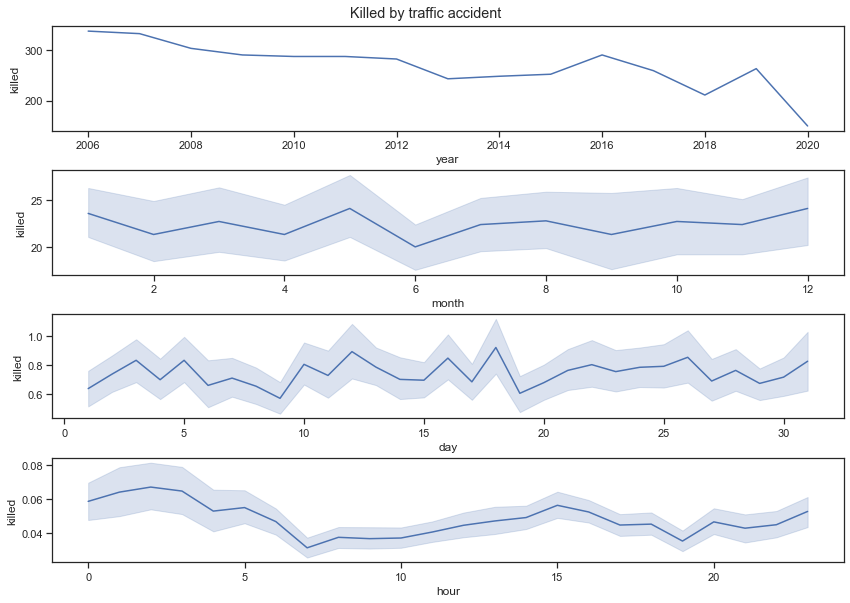

In [155]:
df_agg_killed_yearly = df_acc.groupby('year')['NO_PERSONS_KILLED'].agg(['sum']).rename(columns={'sum': 'killed'}).reset_index()
df_agg_killed_monthly = df_acc.groupby(['year','month'])['NO_PERSONS_KILLED'].agg(['sum']).rename(columns={'sum': 'killed'}).reset_index()
df_agg_killed_day = df_acc.groupby(['year','month','day'])['NO_PERSONS_KILLED'].agg(['sum']).rename(columns={'sum': 'killed'}).reset_index()
df_agg_killed_hour = df_acc.groupby(['year','month','day','hour'])['NO_PERSONS_KILLED'].agg(['sum']).rename(columns={'sum': 'killed'}).reset_index()

sns.set(style="ticks")
fig, axs =plt.subplots(4,1, constrained_layout=True)
fig.suptitle('Killed by traffic accident')
sns.lineplot(x="year", y="killed",  data=df_agg_killed_yearly, ax=axs[0])
sns.lineplot(x = "month", y = "killed", data = df_agg_killed_monthly, ax=axs[1])
sns.lineplot(x = "day", y = "killed", data = df_agg_killed_day, ax=axs[2])
sns.lineplot(x = "hour", y = "killed", data = df_agg_killed_hour, ax=axs[3])


## Killings and accidents per weekday

<AxesSubplot:xlabel='Day Week Description', ylabel='killed'>

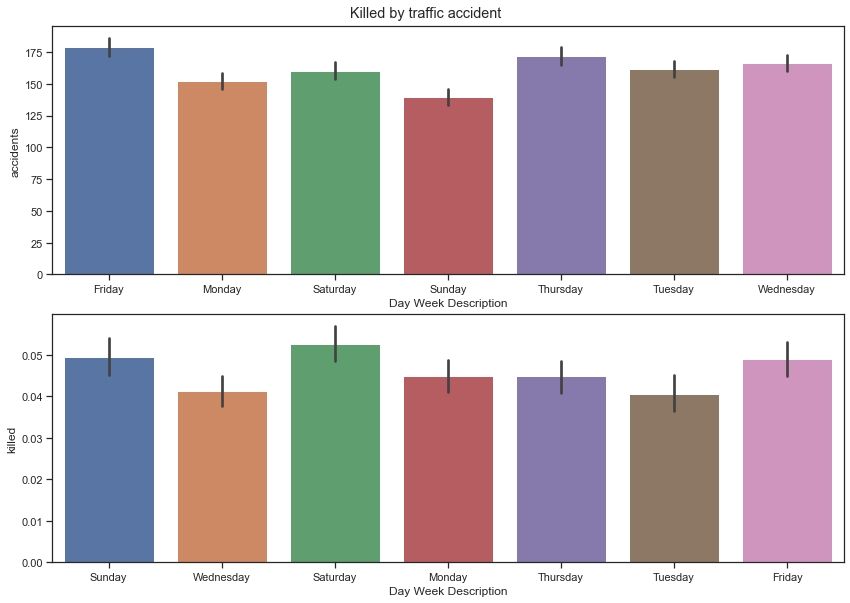

In [185]:
df_agg_accidents_weekday =  df_acc.groupby(['year','month','Day Week Description'])['ACCIDENTTIME'].agg(['size']).rename(columns={'size': 'accidents'}).reset_index()
df_agg_killed_weekday = df_acc.groupby(['year','month','Day Week Description'])['NO_PERSONS_KILLED'].agg(['sum']).rename(columns={'sum': 'killed'}).reset_index()
sns.set(style="ticks")
fig, axs =plt.subplots(2,1, constrained_layout=True)
fig.suptitle('Killed by traffic accident')

sns.barplot(x = "Day Week Description", y = "accidents", data = df_agg_accidents_weekday, ax=axs[0])
sns.barplot(x = "Day Week Description", y = "killed", data = df_agg_killed_hour, ax=axs[1])

## Accidents per year

In [47]:
df_agg = df_acc.groupby([df_acc['year'],df_acc['hour']], as_index=False).count()
df_hourly_acc = df_agg.groupby(df_agg['hour'], as_index=False).mean()

##### Skal nok være average of ikke total

/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


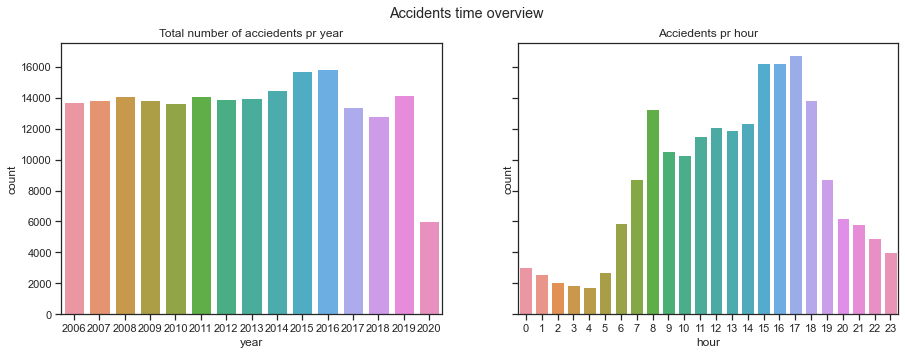

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Accidents time overview')
sns.countplot(df_acc['year'], ax=axes[0])
axes[0].set_title("Total number of acciedents pr year")
g = sns.countplot(df_acc['hour'], ax=axes[1])
g.set_xticklabels(list(range(24)))
axes[1].set_title("Acciedents pr hour")
plt.show()


/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


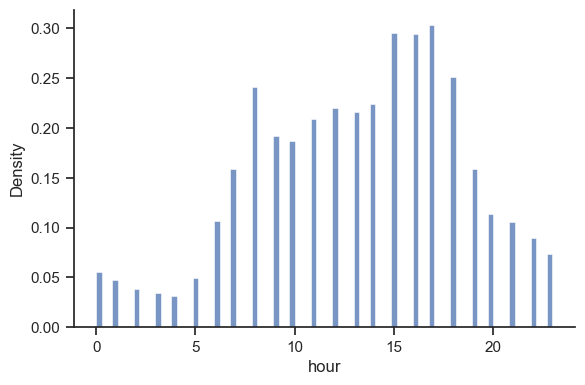

In [175]:
# evt burge dette?
p = sns.displot(data=df_acc, x='hour', stat='density', height=4, aspect=1.5, ax=axes[1])
p.fig.set_dpi(100)

## Type of accident

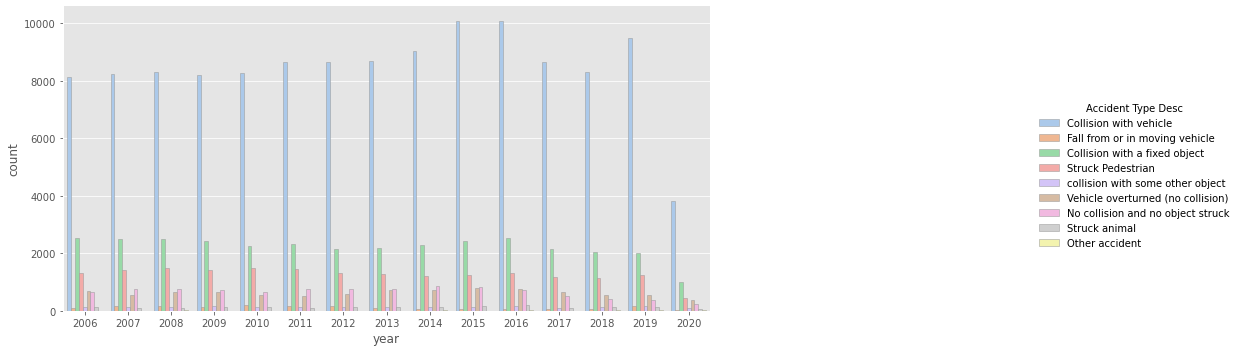

In [209]:
ax = sns.catplot(x="year", hue="Accident Type Desc", kind="count", palette="pastel", edgecolor=".6", data=df_acc)
ax.fig.set_figwidth(20)
plt.show()

The number of accidents have slighly decreased since 2000, however, a small increase is seen in 2005 compared to 2004.

## Accidents per day of week # skal nok være gennemsnitligt

<AxesSubplot:xlabel='Day Week Description'>

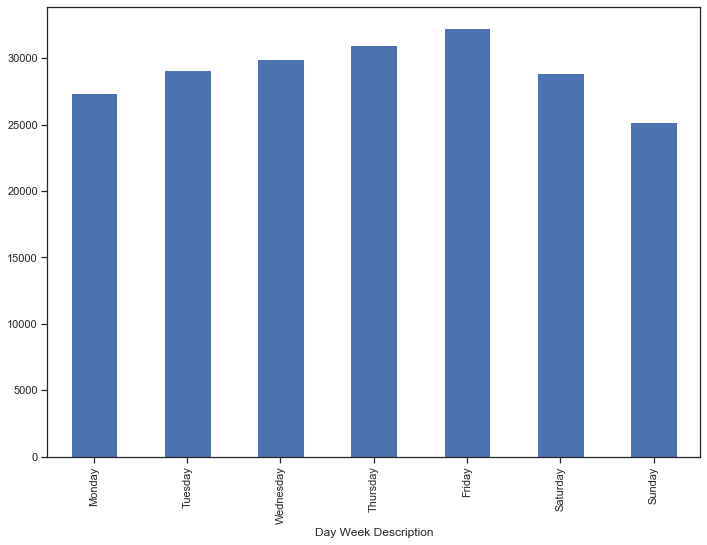

In [146]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df_acc.groupby(['Day Week Description']).size().reindex(cats) 
df_weekday.plot(kind = "bar")


/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


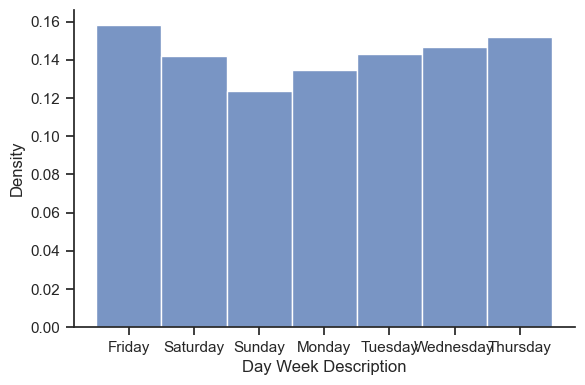

In [147]:
# evt burge dette?
p = sns.displot(data=df_acc, x='Day Week Description', stat='density', height=4, aspect=1.5, ax=axes[1])
p.fig.set_dpi(100)

From the distribution plot, it can be seen that most accidents happen on Fridays. This could be due to people drinking alchohol on Friday evenings and then driving home or due to potentially more traffic in general. 

## Accidents per hour

/Users/katinkaklepsch/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


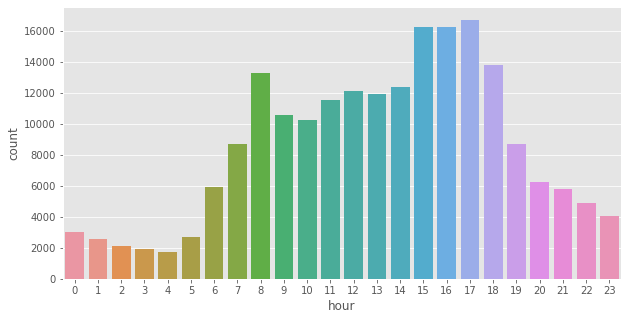

In [25]:
g = sns.countplot(df_acc['hour'])
g.set_xticklabels(list(range(24)))
plt.show()

Most accidents happen around 8am and 3pm-5pm which are the usual rush hours occuring when people drive to and from work. Therefore, it makes good sense that most accidents happen within these timeframes.

## Type of accident

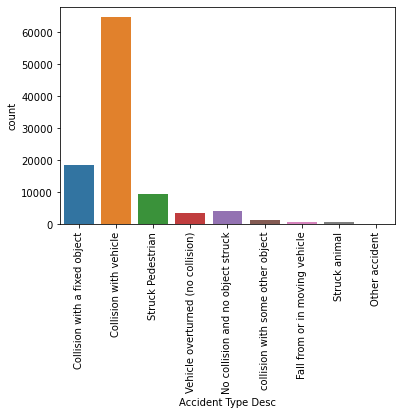

In [47]:
ax = sns.countplot(x=df_acc["Accident Type Desc"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Most accidents occur due to a collision with another vehicle.

## Number of persons injured

<AxesSubplot:xlabel='NO_PERSONS', ylabel='count'>

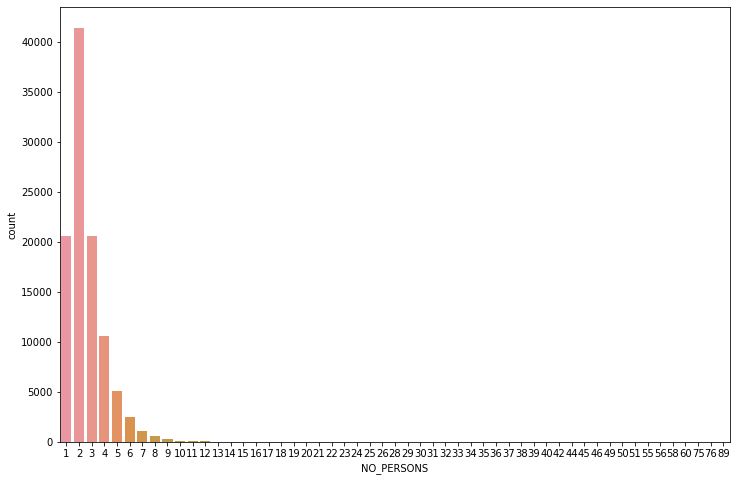

In [73]:
plt.figure(figsize=(12,8))
sns.countplot(x=df_acc.NO_PERSONS)

There are mostly 2 people getting injured per accident. There are some accidents were a lot of people were injured - perhaps these are outliers which should be taken into account when cleaning data.

## Road geometry

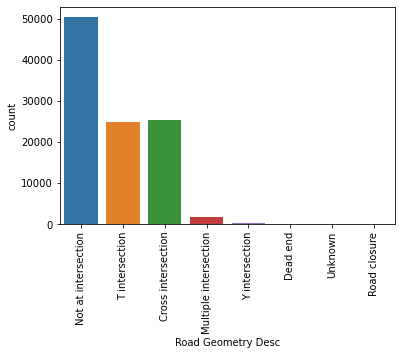

In [79]:
ax = sns.countplot(x=df_acc["Road Geometry Desc"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Most accidents occur at "not at intersection" which means a straight road / highway.

## Speed zone

<AxesSubplot:xlabel='SPEED_ZONE', ylabel='count'>

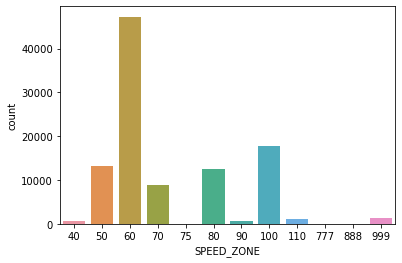

In [80]:
sns.countplot(x=df_acc.SPEED_ZONE)

Most accident happen within speed zones at 60km/hour. This could be due to people driving faster than they are allowed to within this speed zone. 

## Heatmap

In [103]:
import folium
from folium import plugins
from folium.plugins import HeatMap


map_SF = folium.Map(location=[-37.840935, 144.946457],
                    zoom_start = 6) 

# Ensure you're handing it floats
df_node['Y'] = df_node['Lat'].astype(float)
df_node['X'] = df_node['Long'].astype(float)

# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in df_node.iterrows()]

gradient = {.33: 'darkblue', .66: 'purple', 1: 'red'}
# Plot it on the map
HeatMap(heat_data, gradient = gradient, max_zoom=100).add_to(map_SF)

# Display the map
map_SF

## Accident per area

In [104]:
df_node.LGA_NAME.value_counts()

MELBOURNE           7170
DANDENONG           3892
CASEY               3717
GEELONG             3419
MONASH              3314
                    ... 
(LAKE MOUNTAIN)       14
(FALLS CREEK)         10
(MOUNT STIRLING)       5
(MOUNT BAW BAW)        4
(FRENCH ISLAND)        1
Name: LGA_NAME, Length: 86, dtype: int64

Most accidents happen in MelBourne which makes good sense as Melbourne is the second largest city in Australia.

## Accident and road conditions

<AxesSubplot:xlabel='Surface Cond Desc', ylabel='count'>

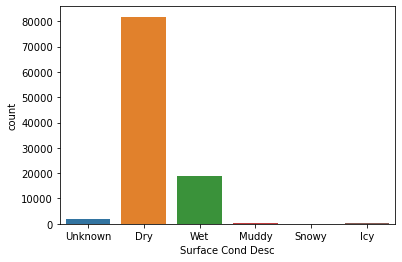

In [109]:
sns.countplot(x=df_road["Surface Cond Desc"])

Most accidents have happened on dry roads meaning in good weather conditions.

<AxesSubplot:xlabel='SURFACE_COND', ylabel='count'>

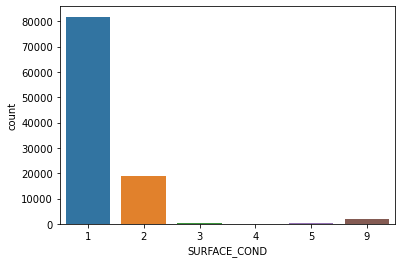

In [111]:
sns.countplot(x=df_road["SURFACE_COND"])

Surface condition 1??

## Gender

<AxesSubplot:xlabel='SEX', ylabel='count'>

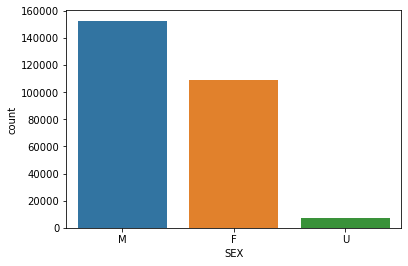

In [112]:
sns.countplot(x=df_person["SEX"])

Mostly men are have been exposed to accidents.

## Age

<AxesSubplot:xlabel='Age Group'>

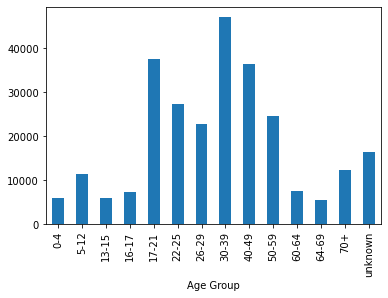

In [117]:
cats = ['0-4', '5-12', '13-15', '16-17', '17-21', '22-25', '26-29', '30-39',
       '40-49', '50-59', '60-64', '64-69', '70+', 'unknown']
df_age = df_person.groupby(["Age Group"]).size().reindex(cats) 
df_age.plot(kind = "bar")

Most people involved in an accident are in the age group 30-39 followed by the age group 17-21.

## Role 

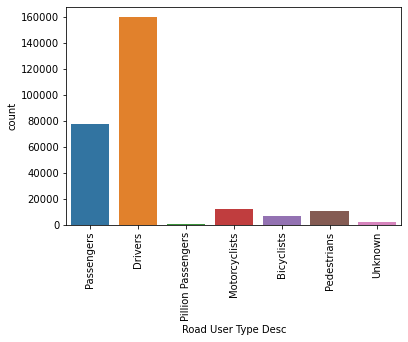

In [119]:
ax = sns.countplot(x=df_person["Road User Type Desc"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

From the distribution is it seen that most people involved in the recorded accidents were drivers.